In [1]:
# Importing essential libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [44]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [45]:
# Print No. of rows and columns
print(f'Total Rows {df_copy.shape[0]}')
print(f'Total Rows {df_copy.shape[1]}')

Total Rows 768
Total Rows 9


In [46]:
#datatypes
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

# Data Visualization

In [47]:
#Collect all columns having Missing values and at what percentage
columns_with_na=[features for features in df_copy.columns if df_copy[features].isnull().sum()>0]

for feature in columns_with_na:
    print(feature, np.round(df_copy[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
Insulin 0.487  % missing values
BMI 0.0143  % missing values


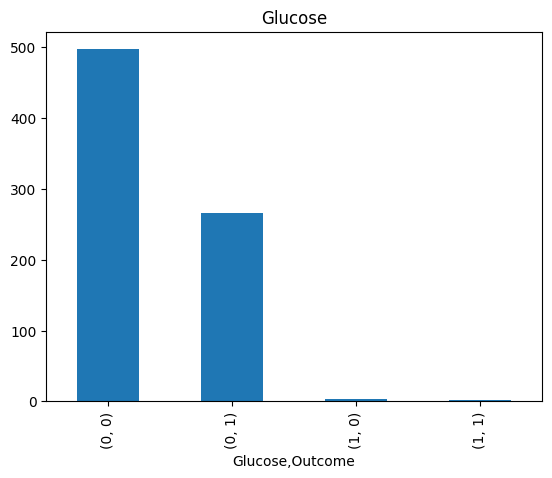

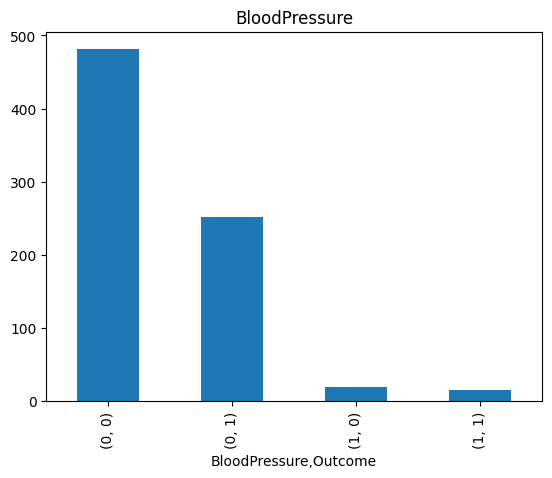

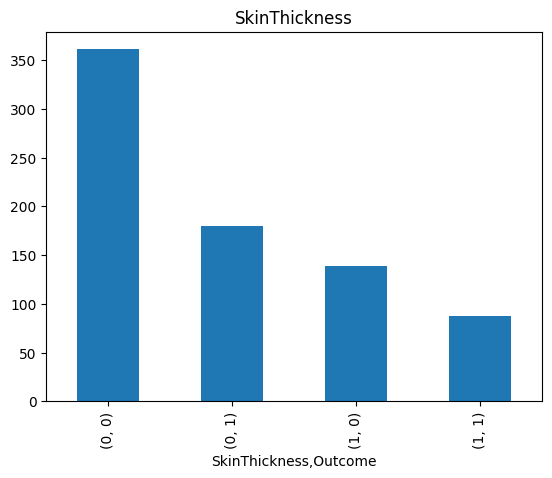

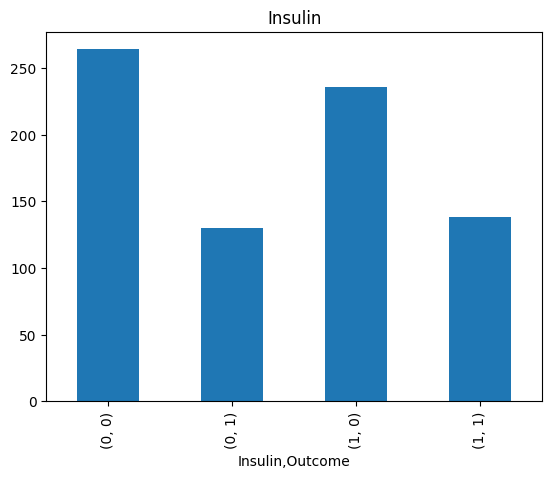

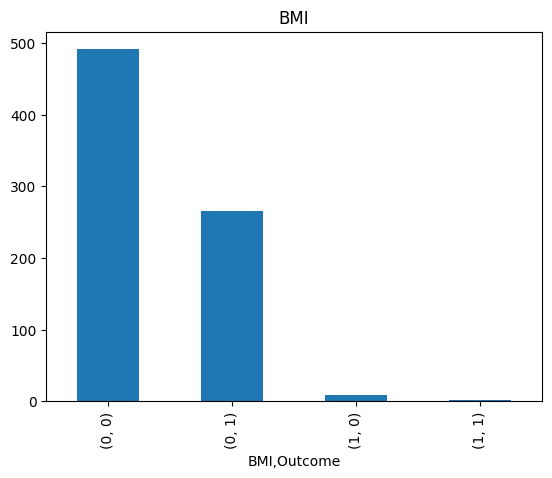

In [48]:
for feature in columns_with_na:
    data = df_copy.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['Outcome'].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

In [49]:
#Get all the columns having numerical values 
num_data = [features for features in df_copy.columns if df_copy[features].dtypes != 'O']
print(f'Number of numerical columns is {len(num_data)}')

df_copy[num_data].head()

Number of numerical columns is 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [50]:
# Check if any numerical columns are discrete
discrete_columns = [feature for feature in df_copy.columns if len(df_copy[feature].unique()) < 20 and feature not in ['Outcome'] ]
print(f'Number of discrete Columns is {len(discrete_columns)}')
for i in discrete_columns:
    print(f'{i} has {len(df_copy[i].unique())} discrete values')

df_copy[discrete_columns].head()

Number of discrete Columns is 1
Pregnancies has 17 discrete values


,Pregnancies
0,6
1,1
2,8
3,1
4,0


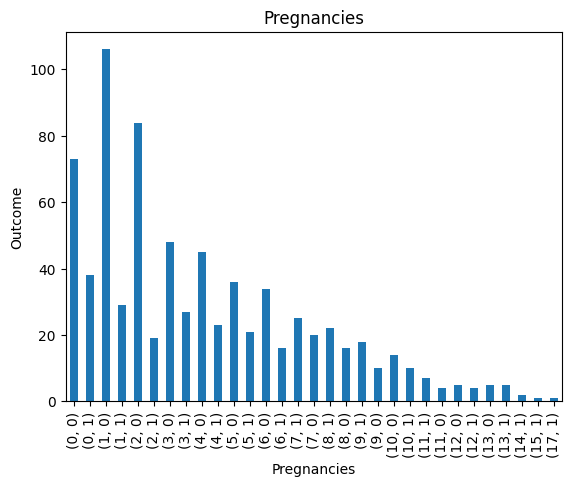

In [51]:
#Check distribution of the discrete data
for feature in discrete_columns:
    dt=df_copy.copy()
    dt.groupby(feature)['Outcome'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(feature)
    plt.show()

In [52]:
# Check if any numerical columns are continous
continous_columns = [feature for feature in num_data if feature not in discrete_columns and feature not in ['Outcome'] ]
print(f'Number of Continous Columns is {len(continous_columns)}')

df_copy[continous_columns].head()

Number of Continous Columns is 7


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33


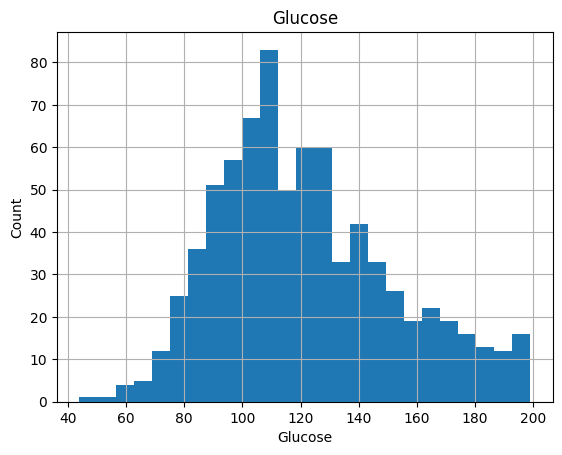

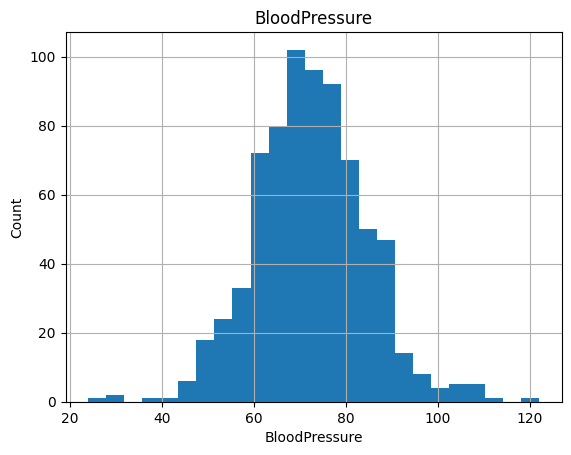

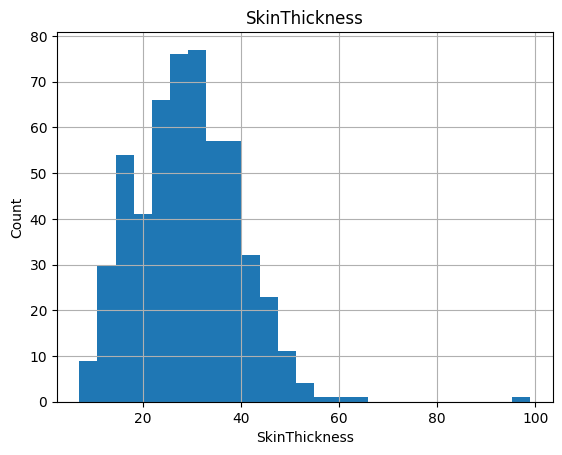

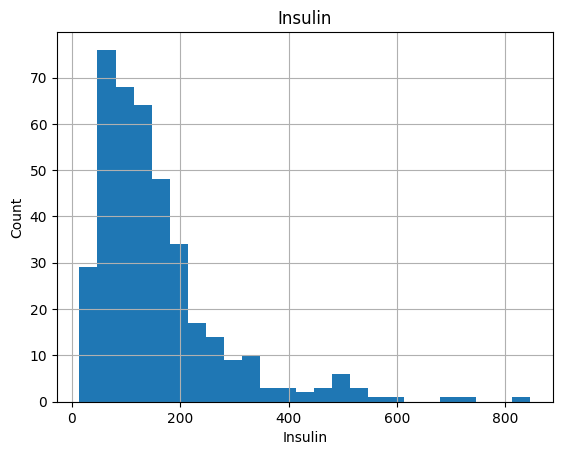

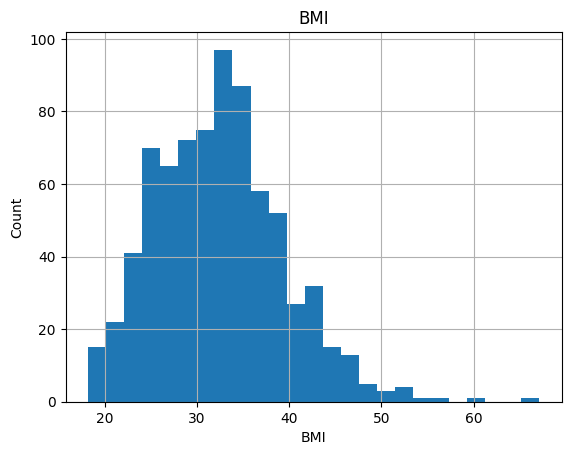

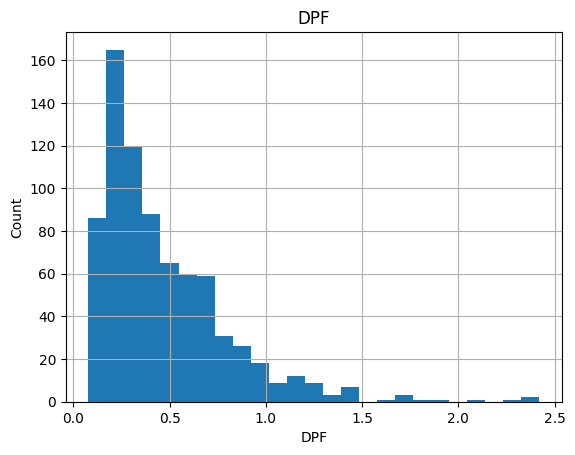

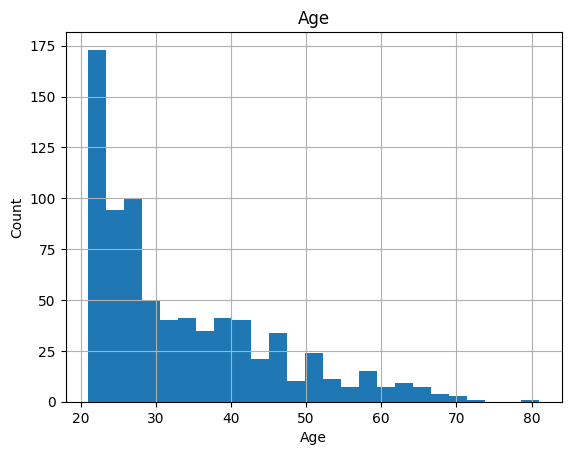

In [53]:
#Check distribution of the Continous data
for feature in continous_columns:
    dt = df_copy.copy()
    dt[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Data Preprocessing

In [54]:
#Collect all columns having Missing values and at what percentage
columns_with_na=[features for features in df_copy.columns if df_copy[features].isnull().sum()>0]

for feature in columns_with_na:
    print(feature, np.round(df_copy[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
Insulin 0.487  % missing values
BMI 0.0143  % missing values


In [55]:
#Replace Nan Values with median of that column and make new column as df_copy[feature_nan]. Give it value 1 is Nan is present else 0 
for feature in columns_with_na:
    median_value = df_copy[feature].mean()
    df_copy[feature+'nan'] = np.where(df_copy[feature].isnull(), 1, 0)
    df_copy[feature].fillna(median_value, inplace = True)
    
df_copy[columns_with_na].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [56]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Glucosenan,BloodPressurenan,SkinThicknessnan,Insulinnan,BMInan
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0,0,0,1,0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0,0,0,1,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0,0,1,1,0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0,0,0,0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0,0,0,0,0


In [57]:
# Remove any duplicate entry
final_df =df_copy.loc[:,~df_copy.columns.duplicated()]

In [58]:
final_df.shape

(768, 14)

In [59]:
# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()


In [61]:
classifier.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[93 14]
 [18 29]]
0.7922077922077922


# Support Vector Machine

In [64]:
from sklearn import svm
classifiersvm = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifiersvm.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
y_pred = classifiersvm.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [66]:
# accuracy score on the test data
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[97 10]
 [18 29]]
0.8181818181818182


# Random Forest

In [67]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()

n_estimators = [10, 20, 30, 50, 100]
max_depth = [2, 3, 5, 7, 10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    }
random_cv = RandomizedSearchCV(estimator=clf,param_distributions=hyperparameter_grid,
                               cv=5, n_iter=5,scoring = 'neg_mean_absolute_error',n_jobs = 4,verbose = 5,
                               return_train_score = True,random_state=42)
random_cv.fit(X_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomForestClassifier(max_depth=10, n_estimators=50)

In [68]:
clf = RandomForestClassifier(max_depth=10, n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [69]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[94 13]
 [16 31]]
0.8116883116883117


# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[2,3, None],
              "max_features":randint(1,9),
              "min_samples_leaf":randint(1,8),
              "criterion": ["gini", "entropy"]
}

tree_cv = RandomizedSearchCV(classifier, parameters, cv = 5)
tree_cv.fit(X_train, y_train)
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       min_samples_leaf=2)

In [72]:
classifierdt = DecisionTreeClassifier(max_depth=2, max_features=6, min_samples_leaf=7)
classifierdt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=6, min_samples_leaf=7)

In [73]:
y_pred = classifierdt.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[93 14]
 [23 24]]
0.7597402597402597


# Making Predictive System

In [75]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Saving the trained Model

In [76]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [77]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [78]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [79]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DPF
Age
